In [6]:
import numpy as np
import otmol as otm
import pandas as pd
from openbabel import pybel
import matplotlib.pyplot as plt
import seaborn as sns
import os
from experiment_utils import experiment, alpha_experiment, interactive_alignment_plot_py3dmol
# %matplotlib widget

In [7]:
data_path = "../Data/FGG-Tripeptide/"
mol_pair_list_path = os.path.join(data_path, 'list')
molecule_pairs = otm.tl.parse_molecule_pairs(mol_pair_list_path, mol_type='FGG')
#mol_set = set()
#for nameA, nameB in molecule_pairs:
#    mol_set.add(nameA)
#    mol_set.add(nameB)
#for name in mol_set:
#    mol = next(pybel.readfile('xyz', os.path.join(data_path, name + '.xyz')))
#    X, _, _ = otm.tl.process_molecule(mol) 
#    _, T_sy2 = otm.tl.parse_sy2(os.path.join(data_path, name + '.sy2'))
#    T_mna = otm.tl.parse_mna(os.path.join(data_path, name + '.mna'))
#    otm.tl.write_xyz_with_custom_labels('../Data/FGG-Tripeptide/{}_sy2.xyz'.format(name), X, T_sy2)
#    otm.tl.write_xyz_with_custom_labels('../Data/FGG-Tripeptide/{}_mna.xyz'.format(name), X, T_mna)

In [8]:
cst_D = 0.5
otmol_name_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='element name', 
    alpha_list=np.linspace(0,1,101), 
    dataset_name = 'FGG',
    save = True,
    cst_D=cst_D
    )
otmol_type_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='atom type', 
    alpha_list=np.linspace(0,1,101), 
    dataset_name = 'FGG',
    save = True,
    cst_D=cst_D
    )
otmol_conn_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='atom connectivity', 
    alpha_list=np.linspace(0,1,101), 
    dataset_name = 'FGG',
    save = True,
    cst_D=cst_D
    )

0 252_FGG55 253_FGG99 2.16
1 252_FGG55 254_FGG300 2.60
2 252_FGG55 255_FGG252 2.53
3 252_FGG55 256_FGG366 2.60
4 252_FGG55 257_FGG215 2.17
5 252_FGG55 258_FGG224 2.19
6 252_FGG55 259_FGG380 1.43
7 252_FGG55 260_FGG412 2.16
8 252_FGG55 261_FGG444 2.30
9 252_FGG55 262_FGG470 2.41
10 252_FGG55 263_FGG80 1.80
11 252_FGG55 264_FGG114 1.97
12 252_FGG55 265_FGG357 1.98
13 252_FGG55 266_FGG691 2.88
0 252_FGG55 253_FGG99 2.06
1 252_FGG55 254_FGG300 2.59
2 252_FGG55 255_FGG252 2.54
3 252_FGG55 256_FGG366 2.63
4 252_FGG55 257_FGG215 2.32
5 252_FGG55 258_FGG224 2.51
6 252_FGG55 259_FGG380 1.40
7 252_FGG55 260_FGG412 2.23
8 252_FGG55 261_FGG444 2.33
9 252_FGG55 262_FGG470 2.43
10 252_FGG55 263_FGG80 1.94
11 252_FGG55 264_FGG114 1.87
12 252_FGG55 265_FGG357 2.05
13 252_FGG55 266_FGG691 2.93
0 252_FGG55 253_FGG99 2.28
1 252_FGG55 254_FGG300 2.64
2 252_FGG55 255_FGG252 2.54
3 252_FGG55 256_FGG366 2.66
4 252_FGG55 257_FGG215 2.38
5 252_FGG55 258_FGG224 2.50
6 252_FGG55 259_FGG380 1.60
7 252_FGG55 260_F

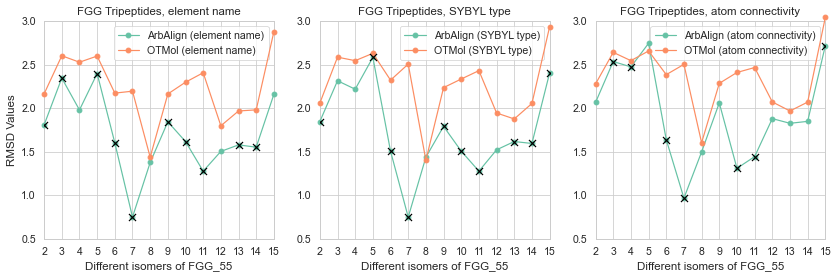

In [29]:
arbalign_res = pd.read_csv('./arbalign_output/FGG_result.csv')

combined_df = pd.concat([
    arbalign_res.rename(columns={
        'RMSD(ArbAlign+element name)': 'ArbAlign (element name)', 
        'RMSD(ArbAlign+atom type)': 'ArbAlign (SYBYL type)',
        'RMSD(ArbAlign+atom connectivity)': 'ArbAlign (atom connectivity)'
        }), 
    otmol_name_res.rename(columns={'RMSD(OTMol+element name)': 'OTMol (element name)'}), 
    otmol_type_res.rename(columns={'RMSD(OTMol+atom type)': 'OTMol (SYBYL type)'}), 
    otmol_conn_res.rename(columns={'RMSD(OTMol+atom connectivity)': 'OTMol (atom connectivity)'}
    ), 
    ], axis=1)
plt.figure(figsize=(14,4))
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)
sns.set_palette("Set2")
plt.subplot(131)
plt.plot(range(2,16), combined_df["ArbAlign (element name)"], marker='o', label="ArbAlign (element name)", clip_on=False, zorder=10)
plt.scatter(
            np.array(range(2,16))[arbalign_res['reflection_name'] == True], 
            combined_df["ArbAlign (element name)"][arbalign_res['reflection_name'] == True], 
            color='black',
            marker='x',  # Different marker for False values
            s=50,
            zorder=20,  # Higher zorder to appear on top
        )
plt.plot(range(2,16), combined_df["OTMol (element name)"], marker='o', label="OTMol (element name)", clip_on=False, zorder=10)
plt.title("FGG Tripeptides, element name")
plt.xlabel("Different isomers of FGG_55")
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend()
plt.grid(True)

plt.subplot(132)
plt.plot(range(2,16), combined_df["ArbAlign (SYBYL type)"], marker='o', label="ArbAlign (SYBYL type)", clip_on=False, zorder=10)
plt.scatter(
            np.array(range(2,16))[arbalign_res['reflection_type'] == True], 
            combined_df["ArbAlign (SYBYL type)"][arbalign_res['reflection_type'] == True], 
            color='black',
            marker='x',  # Different marker for False values
            s=50,
            zorder=20,  # Higher zorder to appear on top
        )
plt.plot(range(2,16), combined_df["OTMol (SYBYL type)"], marker='o', label="OTMol (SYBYL type)", clip_on=False, zorder=10)
plt.title("FGG Tripeptides, SYBYL type")
plt.xlabel("Different isomers of FGG_55")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend()
plt.grid(True)

plt.subplot(133)
plt.plot(range(2,16), combined_df["ArbAlign (atom connectivity)"], marker='o', label="ArbAlign (atom connectivity)", clip_on=False, zorder=10)
plt.scatter(
            np.array(range(2,16))[arbalign_res['reflection_conn'] == True], 
            combined_df["ArbAlign (atom connectivity)"][arbalign_res['reflection_conn'] == True], 
            color='black',
            marker='x',  # Different marker for False values
            s=50,
            zorder=20,  # Higher zorder to appear on top
        )
plt.plot(range(2,16), combined_df["OTMol (atom connectivity)"], marker='o', label="OTMol (atom connectivity)", clip_on=False, zorder=10)
plt.title("FGG Tripeptides, atom connectivity")
plt.xlabel("Different isomers of FGG_55")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend(loc='upper right')
plt.grid(True)
plt.savefig('../images/FGG.png', dpi=300, bbox_inches='tight')

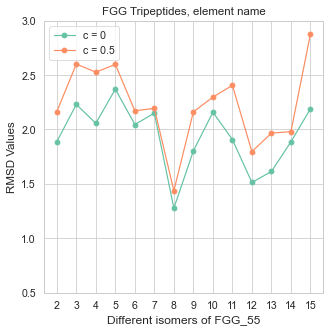

In [10]:
FGG_otmol_name = pd.read_csv('./otmol_output/FGG_element_name_fGW_cstD=0.0_results.csv').rename(columns={'RMSD(OTMol+element name)': 'c = 0'})['c = 0']
FGG_otmol_name_ = pd.read_csv('./otmol_output/FGG_element_name_fGW_cstD=0.5_results.csv').rename(columns={'RMSD(OTMol+element name)': 'c = 0.5'})['c = 0.5']
plt.figure(figsize=(5,5))
#for column in columns_to_plot:
plt.plot(range(2,16), FGG_otmol_name, marker='o', label='c = 0')
plt.plot(range(2,16), FGG_otmol_name_, marker='o', label='c = 0.5')
plt.title("FGG Tripeptides, element name")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.legend()
plt.grid(True)
plt.savefig('../images/FGG_element_name.png', dpi=300, bbox_inches='tight')

In [11]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/253_FGG99.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][0]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [12]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/254_FGG300.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][1]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [13]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/255_FGG252.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][2]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned[assignment]))
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

2.526897469508979


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [14]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/256_FGG366.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][3]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [15]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/257_FGG215.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][4]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [16]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/258_FGG224.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][5]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [17]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/259_FGG380.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][6]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [18]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/260_FGG412.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][7]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [19]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/261_FGG444.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][8]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [20]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/262_FGG470.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][9]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned[assignment]))
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

2.4056545494041996


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [21]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/263_FGG80.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][10]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [22]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/264_FGG114.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][11]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [23]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/265_FGG357.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][12]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [24]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/266_FGG691.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][13]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

alpha

No valid assignment found
1.0


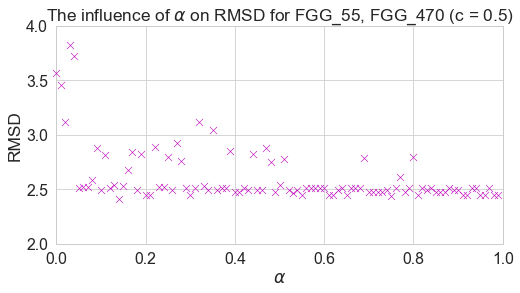

In [25]:
alpha_list = np.linspace(0, 1, 101)
alpha_result = alpha_experiment(data_path, '252_FGG55', '262_FGG470', alpha_list=alpha_list, cst_D=0.5)
# Set seaborn style and context
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
sns.set_palette("Set1")
# Create the plot using seaborn
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=alpha_result,
    x='alpha',
    y='RMSD(OTMol+element name)',
    marker='x',
    s=50,
    color='m',
    #label=r'FGG$\_$55, FGG$\_$224',
    clip_on=False,
    zorder=10
)
plt.xlim(0, 1)
plt.ylim(2, 4)
plt.xlabel(r'$\alpha$')
plt.ylabel('RMSD')
plt.xticks(np.linspace(0, 1, 6))
plt.title(r'The influence of $\alpha$ on RMSD for FGG$\_$55, FGG$\_$470 (c = 0.5)')
# Save the figure
plt.savefig('../images/alpha_FGG_element_name.png', dpi=300, bbox_inches='tight')

In [26]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/262_FGG470.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
i = 1
assignment = alpha_result['assignment'][i]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
print(alpha_result['alpha'][i], otm.tl.root_mean_square_deviation(X_A, X_B_aligned[assignment]))
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

0.01 3.45411345450871


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [28]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/262_FGG470.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
i = 62
assignment = alpha_result['assignment'][i]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
print(alpha_result['alpha'][i], otm.tl.root_mean_square_deviation(X_A, X_B_aligned[assignment]))
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '', save=False)

0.62 2.448032958915575


3Dmol.js failed to load for some reason. Please check your browser console for error messages.